<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left"><i>Machine learning<i> para la toma de decisiones y la automatización de procesos empresariales</h1>

<h2 align="left"><i>Customer Segmentation and Prediction of Target Marketing</i></h2>

<p align="left">
  <h3><a href="https://joefaver.dev">Joseph F. Vergel-Becerra</a> | Aplicaciones de Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>22/02/2023</i>
  <br><br>
  <!-- <a href="#tabla-de-contenido">Tabla de contenido</a> • -->
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <!-- <a href="#agradecimientos">Agradecimientos</a> -->
  <br><br>
</p>
<table align="left">
  <td>
      <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
        <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
      </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-ml-course/blob/main/banking_marketing_and_interest_rates_ml_al_detal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
      </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-ml-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-ml-course?style=social" alt="Fork"/>
      </a>
  </td>
</table>
<br>
<br>

---

Ofrecer un servicio o producto a los clientes con un perfil de posible comprador, constituye un factor diferenciador en las estrategias comerciales y de marketing de las compañías e impacta drásticamente en el ahorro de recursos de estas divisiones. Es así como se define el concepto de *target* u objetivo en marketing, que no es más que la definición de los clientes potenciales o público general, que tiene como objetivo una determinada estrategia de marketing, a la hora de hacerles llegar los  productos o servicios de la compañía. En esta oportunidad **representaremos el brazo tecnológico de la división de marketing y comercialización de una institución bancaria** y plantearemos una solución predictiva sobre datos de campañas de marketing telefónico, con la que **predeciremos la probabilidad de que un cliente contrate un certificado de depósito a plazo fijo (CDP)**. De esta manera podremos ofrecerle a nuestros clientes con mayor probabilidad de suscripción, **campañas publicitarias acertadas que maximizen la captación de nuevos contratos** y que al mismo tiempo **reduzcan los costos publicitarios**.

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.")
assert sys.version_info >= (3, 8)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
print("[INFO] Versiones vificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-ml-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.8 o superior y Scikit-Learn 1.0.1 o superior.
[INFO] Versiones vificadas exitosamente!


In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "banking-marketing-targets"
DATA_PATH = f"datasets/{DATASET}/"


def download_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


download_dataset(dataset=DATASET)

[INFO] Dataset 'banking-marketing-targets' downloaded and uncompressed correctly!


In [3]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/banking-marketing-targets/":

['test.csv', 'train.csv']


In [4]:
import os

import pandas as pd


train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"), sep=";")
test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"), sep=";")

train.rename(columns={"y": "cd"}, inplace=True)
test.rename(columns={"y": "cd"}, inplace=True)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    
    print(f"\n[INFO] testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



[INFO] testing dataset dimnesions (rows, cols): (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Información de las variables del *dataset*

Datos del cliente:

1. `edad` (numérico): edad del cliente.
2. `job` (categórico): tipo de trabajo.
3. `marital` (categórico): estado civil.
4. `educación` (categórico): Nivel de escolaridad (studios primarios, secundarios o terciarios).
5. `default` (*booleano*): ¿tiene algun credito en mora?
6. `balance` (numérico): saldo promedio anual, en euros.
7. `housing` (*booleano*): ¿tiene préstamo de vivienda?.
8. `loan` (*booleano*): ¿tiene préstamo personal?.

Las siguientes variables estan relacionadas con el último contacto de la campaña de marketing actual:

9. `contact` (categórico): tipo de comunicación con el cliente.
10. `day` (numérico): último día de contacto del mes.
11. `month` (categórico): último mes de contacto del año.
12. `duration` (numérico): duración del último contacto, en segundos.

Otros atributos de las instancias:

13. `campaign` (numérico): número de contactos realizados durante esta campaña y para este cliente, incluye último contacto.
14. `pdays` (numérico): número de días que transcurrieron desde la última vez que se contactó al cliente en una campaña anterior, donde -1 significa que el cliente no fue contactado previamente.
15. `previous` (numérico): número de contactos realizados antes de esta campaña y para este cliente 
16. `poutcome` (categórico): resultado de la campaña de marketing anterior.

Variable objetivo (*target*) a predecir:

17. `cd` (*booleano*): ¿El cliente ha suscrito un depósito a plazo?.

## Imputación

In [5]:
import numpy as np


train.replace("unknown", np.nan, inplace=True)
test.replace("unknown", np.nan, inplace=True)

Despues de analizar los valore faltantes, se define que:

- `job` y `education` seran imputadas mediante imputacion simple y la estrategia del valor mas frecuente.
- `contact` y `poutcome` seran descartadas del *dataset*.

In [6]:
from sklearn.impute import SimpleImputer


imp_mode = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent'
)
imp_mode.fit(train[["job", "education"]])
train[["job", "education"]] = imp_mode.transform(train[["job", "education"]])

train.drop(["contact", "poutcome"], axis=1, inplace=True, errors="ignore")

with pd.option_context('display.max_columns', None):
    display(train)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


Para evitar la fuga de datos o *data leakage*, utilizamos el mismo imputador ajustado en los datos del conjunto de entrenamiento, sobre el conjunto de *test*.

In [7]:
test[["job", "education"]] = imp_mode.transform(test[["job", "education"]])
test.drop(["contact", "poutcome"], axis=1, inplace=True, errors="ignore")

with pd.option_context('display.max_columns', None):
    display(test)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,-1,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,-1,0,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,-1,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,211,3,no


## Ingeniería de características

En cuanto al proceso de ingeniería de características, el gerente comercial y de marketing nos comenta que recientemente ha leído el artículo "[How Age Impacts Consumer Behavior in Retail Banking](https://thefinancialbrand.com/news/financial-education/age-consumer-behavior-patterns-banking-61246/)". El gerente nos explica que en términos generales, el artículo propone un análisis segmentado de cuales son los productos y servicios que más les interesa a los clientes del sector bancario, en términos de  rangos de edad. El gerente manifiesta su interés en llevar este conocimiento al algoritmo de *machine learning*.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://thefinancialbrand.com/wp-content/uploads/2016/09/financial_education_topics.png" alt="standard-correlation">
  </a>
</p><br><br>

In [8]:
age_ranges = {
    1: (18, 25),
    2: (25, 35),
    3: (35, 45),
    4: (45, 55),
    5: (55, 65),
    6: (65,75),
    7: (75, 85),
    8: (85, 200)
}


def transform_age_to_categorical(ages, age_ranges):
    cat_age = [[
        ranges_index for ranges_index, range in age_ranges.items()
        if range[0] <= age < range[1]
    ] for age in ages]

    return [item for sublist in cat_age for item in sublist]


train["cat_age"] = transform_age_to_categorical(train["age"].tolist(), age_ranges)
test["cat_age"] = transform_age_to_categorical(test["age"].tolist(), age_ranges)

with pd.option_context('display.max_columns', None):
    display(train)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no,5
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no,2
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no,4
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes,4
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes,6
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes,6
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no,5


## Transformación de características

In [9]:
for feature in ["default", "housing", "loan", "cd"]:
    train[feature] = train[feature].replace(["yes", "no"], [1, 0]).astype(int)
    test[feature] = test[feature].replace(["yes", "no"], [1, 0]).astype(int)

train["pdays"] = train["pdays"].replace(-1, 0)
test["pdays"] = test["pdays"].replace(-1, 0)

Necesitamos transformar las características categóricas. Las dos formas basicas para hacerlo son *labeling encoding* y el *one-hot encoding* (variante del *dummy encoding*).

- `job`: Usaremos *labeling encoding* porque hay muchas categorías.
- `education`: Usaremos la codificación de etiquetas porque es una característica categórica ordinal.
- `marital`: Usaremos *one-hot encoding*.
- `month`: Usaremos *one-hot encoding*.
<!-- - `poutcome` : Usaremos *one-hot encoding*. -->

In [10]:
from sklearn.preprocessing import LabelEncoder


laenc = LabelEncoder()
# train['job'] = laenc.fit_transform(train['job'])
train['education'] = laenc.fit_transform(train['education'])
test['education'] = laenc.fit_transform(test['education'])
train = pd.concat([
    train,
    pd.get_dummies(train["job"], prefix='job'),
    pd.get_dummies(train["marital"], prefix='marital'),
    pd.get_dummies(train["month"], prefix='month')
], axis=1)

test = pd.concat([
    test,
    pd.get_dummies(test["job"], prefix='job'),
    pd.get_dummies(test["marital"], prefix='marital'),
    pd.get_dummies(test["month"], prefix='month')
], axis=1)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 42)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,management,married,2,0,2143,1,0,5,may,261,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,technician,single,1,0,29,1,0,5,may,151,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,entrepreneur,married,1,0,2,1,1,5,may,76,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,blue-collar,married,1,0,1506,1,0,5,may,92,1,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,blue-collar,single,1,0,1,0,0,5,may,198,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
train["month"] = train["month"].replace(
    list(train["month"].value_counts().index),
    [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
)
test["month"] = test["month"].replace(
    list(test["month"].value_counts().index),
    [5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12]
)

train["year"] = pd.Series([2022] * len(train))
train["date"] = pd.to_datetime(train[['year', 'month', 'day']])

test["year"] = pd.Series([2023] * len(test))
test["date"] = pd.to_datetime(test[['year', 'month', 'day']])

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 44)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,date
0,58,management,married,2,0,2143,1,0,5,5,261,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
1,44,technician,single,1,0,29,1,0,5,5,151,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
2,33,entrepreneur,married,1,0,2,1,1,5,5,76,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
3,47,blue-collar,married,1,0,1506,1,0,5,5,92,1,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05
4,33,blue-collar,single,1,0,1,0,0,5,5,198,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2022,2022-05-05



[INFO] Testing dataset dimnesions (rows, cols): (4521, 44)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,cd,cat_age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,year,date
0,30,unemployed,married,0,0,1787,0,0,19,10,79,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2023,2023-10-19
1,33,services,married,1,0,4789,1,1,11,5,220,1,339,4,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2023,2023-05-11
2,35,management,single,2,0,1350,1,0,16,4,185,1,330,1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2023,2023-04-16
3,30,management,married,2,0,1476,1,1,3,6,199,4,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2023,2023-06-03
4,59,blue-collar,married,1,0,0,1,0,5,5,226,1,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2023,2023-05-05


In [12]:
!pip install -U feature-engine

`CyclicalFeatures()` aplica transformaciones cíclicas a variables numéricas, devolviendo 2 nuevas características por cada variable, según:

$$var\_sin = \sin(variable * (2. * pi / max\_value))$$

$$var\_cos = \cos(variable * (2. * pi / max\_value))$$

In [13]:
from feature_engine.creation import CyclicalFeatures


cyc_enc = CyclicalFeatures()
cyc_enc.fit(train[["day", "month"]])
train = pd.concat(
    [train, cyc_enc.transform(train[["day", "month"]])],
axis=1)

test = pd.concat(
    [test, cyc_enc.transform(test[["day", "month"]])],
axis=1)

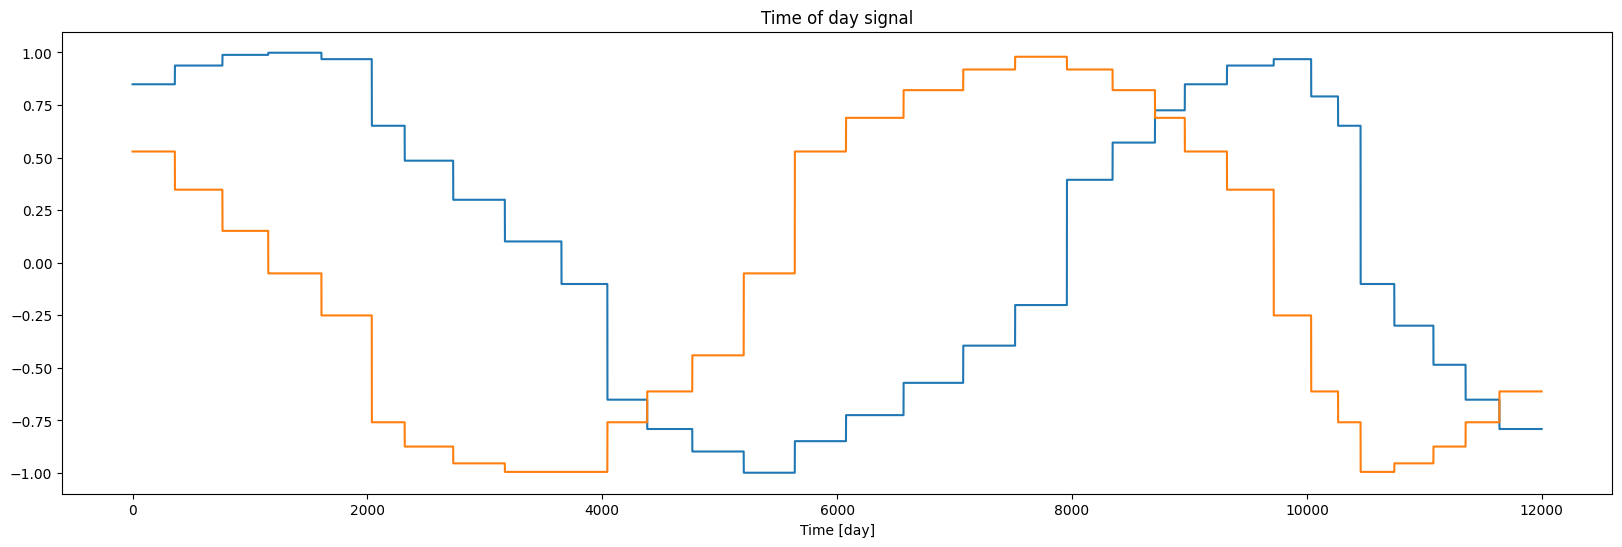

In [14]:
plt.figure(figsize=(20, 6))
plt.plot(train['day_sin'][0:12000])#.unique())
plt.plot(train['day_cos'][0:12000]) #.unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

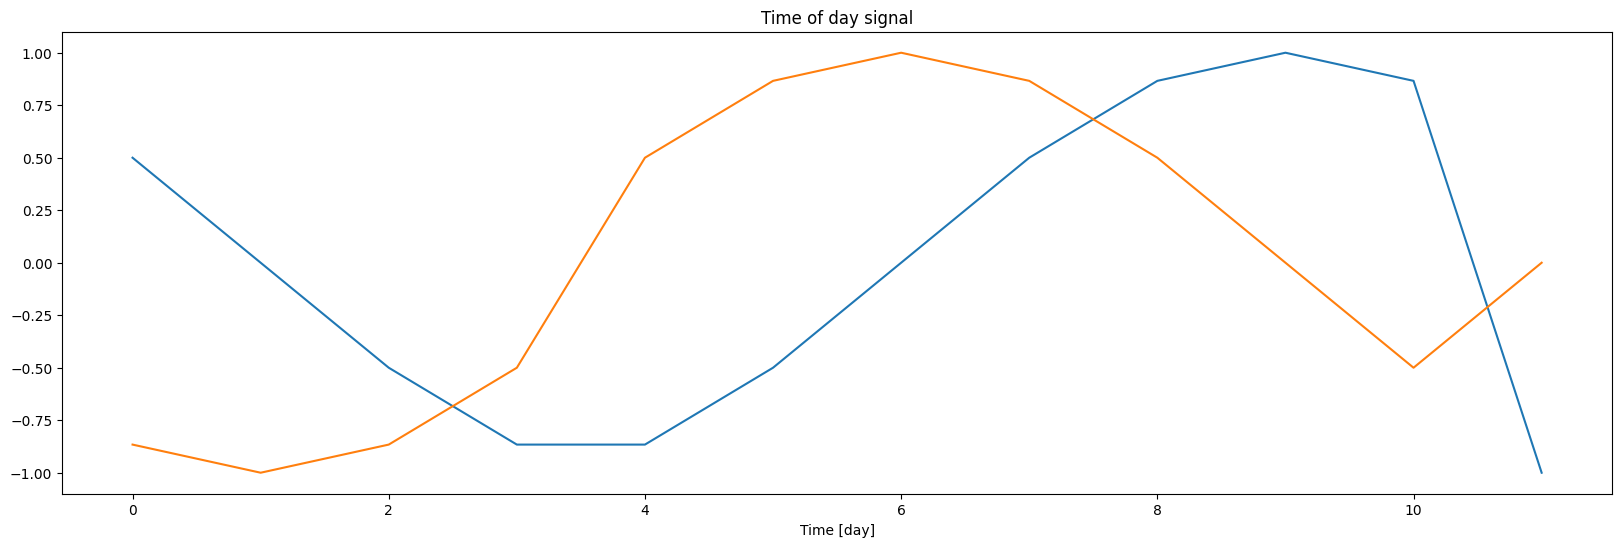

In [15]:
plt.figure(figsize=(20, 6))
plt.plot(train['month_sin'].unique())
plt.plot(train['month_cos'].unique())
plt.xlabel('Time [day]')
plt.title('Time of day signal')
plt.show()

In [16]:
baseline_features = [
       'age', 'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'
]
features = [
       'education', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'cat_age'
]

target = 'cd'

<a id="entrenamiento-de-modelos"></a>
## 5. Entrenamiento de modelos

In [17]:
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train[baseline_features].shape}")
    display(train[baseline_features].head())
    print(f"\n[INFO] Testing dataset dimnesions (rows, cols): {test[baseline_features].shape}")
    display(test[baseline_features].head())

[INFO] Training dataset dimnesions (rows, cols): (45211, 36)


,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2,0,2143,1,0,261,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,1,0,29,1,0,151,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,1,0,2,1,1,76,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47,1,0,1506,1,0,92,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33,1,0,1,0,0,198,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0



[INFO] Testing dataset dimnesions (rows, cols): (4521, 36)


,age,education,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,0,0,1787,0,0,79,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,33,1,0,4789,1,1,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,35,2,0,1350,1,0,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,30,2,0,1476,1,1,199,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,59,1,0,0,1,0,226,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
X_train, X_test = train[baseline_features].values, test[baseline_features].values,
y_train, y_test = train[target].values, test[target].values

In [19]:
from sklearn.linear_model import SGDClassifier

SEED = 42


sgd_clf = SGDClassifier(random_state=SEED)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [20]:
from sklearn.model_selection import cross_val_score

print(
    "[INFO] Accuracy in training: ",
    np.mean(cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy"))
)
print(
    "[INFO] Accuracy in testing: ",
    np.mean(cross_val_score(sgd_clf, X_test, y_test, cv=5, scoring="accuracy"))
)

[INFO] Accuracy in training:  0.7735257948072474
[INFO] Accuracy in testing:  0.705344448247201


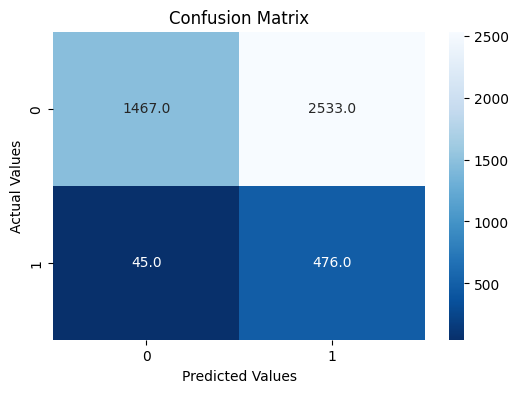

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm: np.array, title: str = None):
    plt.figure(figsize=(6, 4))
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='.1f')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')
    cm_plot.set_title("Confusion Matrix" if title is None else f"{title}")
    plt.show()


y_pred = sgd_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

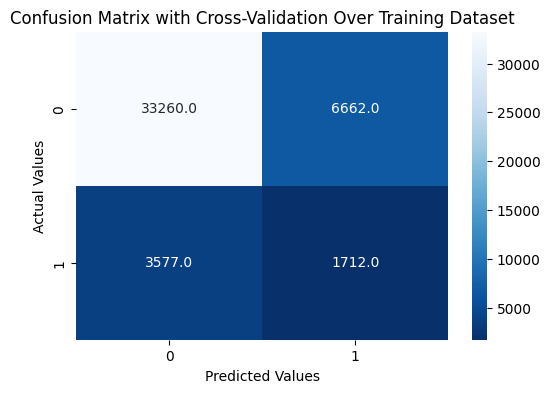

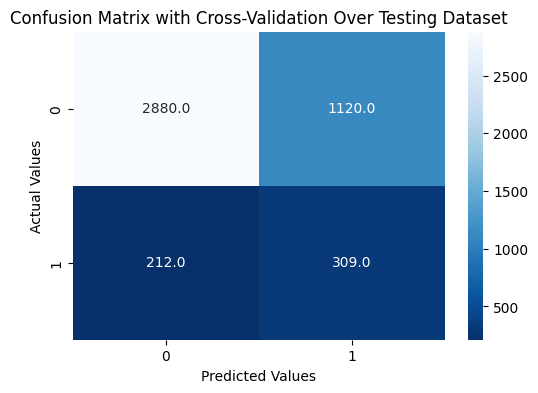

In [22]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Training Dataset")

y_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=5)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, "Confusion Matrix with Cross-Validation Over Testing Dataset")

<a id='referencias'></a>
## Referencias

[1] Halswanter, T. (2016). *An Introduction to Statistics with Python: With Applications in the Life Sciences.* Springer.

[2] Géron, A. (2022). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow.* " O'Reilly Media, Inc.".

[3] VanderPlas, J. (2016). *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.".

[4] Aggarwal, C. C. (2015). *Data mining: the textbook (Vol. 1)*. New York: springer.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joseph@guane.com.co">info@joefaver.dev</a> o directamente en el repositorio.</p>